In [15]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [16]:
# Paths
dataset_root = "/Users/mac/Developer/VScode/no-time-to-train/data/olive_diseases"
split = "train2017" # or val2017, test2017
ann_file = os.path.join(dataset_root, "annotations", f"instances_{split}.json")
img_dir = os.path.join(dataset_root, split)

# Load annotations
print(f"Loading annotations from {ann_file}...")
with open(ann_file, 'r') as f:
    coco_data = json.load(f)

print(f"Loaded {len(coco_data['images'])} images and {len(coco_data['annotations'])} annotations.")
print("Categories:", coco_data['categories'])

Loading annotations from /Users/mac/Developer/VScode/no-time-to-train/data/olive_diseases/annotations/instances_train2017.json...
Loaded 956 images and 3388 annotations.
Categories: [{'id': 0, 'name': 'diseases-usdB', 'supercategory': 'none'}, {'id': 1, 'name': 'Anthracnose', 'supercategory': 'diseases-usdB'}, {'id': 2, 'name': 'BlackScale', 'supercategory': 'diseases-usdB'}, {'id': 3, 'name': 'OlivePeacockSpot', 'supercategory': 'diseases-usdB'}, {'id': 4, 'name': 'Psyllid', 'supercategory': 'diseases-usdB'}, {'id': 5, 'name': 'Tuberculosis', 'supercategory': 'diseases-usdB'}]


In [17]:
def get_img_info(img_id):
    for img in coco_data['images']:
        if img['id'] == img_id:
            return img
    return None

def get_anns(img_id):
    return [ann for ann in coco_data['annotations'] if ann['image_id'] == img_id]

def get_category_name(cat_id):
    for cat in coco_data['categories']:
        if cat['id'] == cat_id:
            return cat['name']
    return "Unknown"

In [18]:
# Generate colors for categories using tab10 colormap
unique_cat_ids = sorted([cat['id'] for cat in coco_data['categories']])
color_map = {cat_id: plt.cm.tab10(i % 10) for i, cat_id in enumerate(unique_cat_ids)}

def show_image_with_anns(img_id, ax=None):
    img_info = get_img_info(img_id)
    if not img_info:
        print(f"Image {img_id} not found")
        return

    img_path = os.path.join(img_dir, img_info['file_name'])
    if not os.path.exists(img_path):
        print(f"Image file not found: {img_path}")
        return
        
    image = Image.open(img_path)
    anns = get_anns(img_id)

    created_ax = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
        created_ax = True

    ax.imshow(image)

    if not anns:
        # print(f"No annotations for image {img_id}")
        pass

    for ann in anns:
        bbox = ann['bbox']
        cat_id = ann['category_id']
        cat_name = get_category_name(cat_id)
        
        # Get color based on category
        color = color_map.get(cat_id, 'red')
        
        # COCO bbox is [x, y, width, height]
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Add text with background
        ax.text(bbox[0], bbox[1]-2, cat_name, color='white', fontsize=10, fontweight='bold', 
                bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1))
        
        # Optional: Segmentation if available
        if 'segmentation' in ann and ann['segmentation']:
             for seg in ann['segmentation']:
                if isinstance(seg, list): # Polygon
                     poly = np.array(seg).reshape((-1, 2))
                     poly_patch = patches.Polygon(poly, linewidth=1, edgecolor=color, facecolor=color, alpha=0.3)
                     ax.add_patch(poly_patch)


    ax.axis('off')
    
    if created_ax:
        plt.show()

Visualizing Image ID: 928, File: 000000000274.jpg
Visualizing Image ID: 681, File: 000000000894.jpg
Visualizing Image ID: 942, File: 000000000843.jpg
Visualizing Image ID: 944, File: 000000000817.jpg
Visualizing Image ID: 914, File: 000000000293.jpg


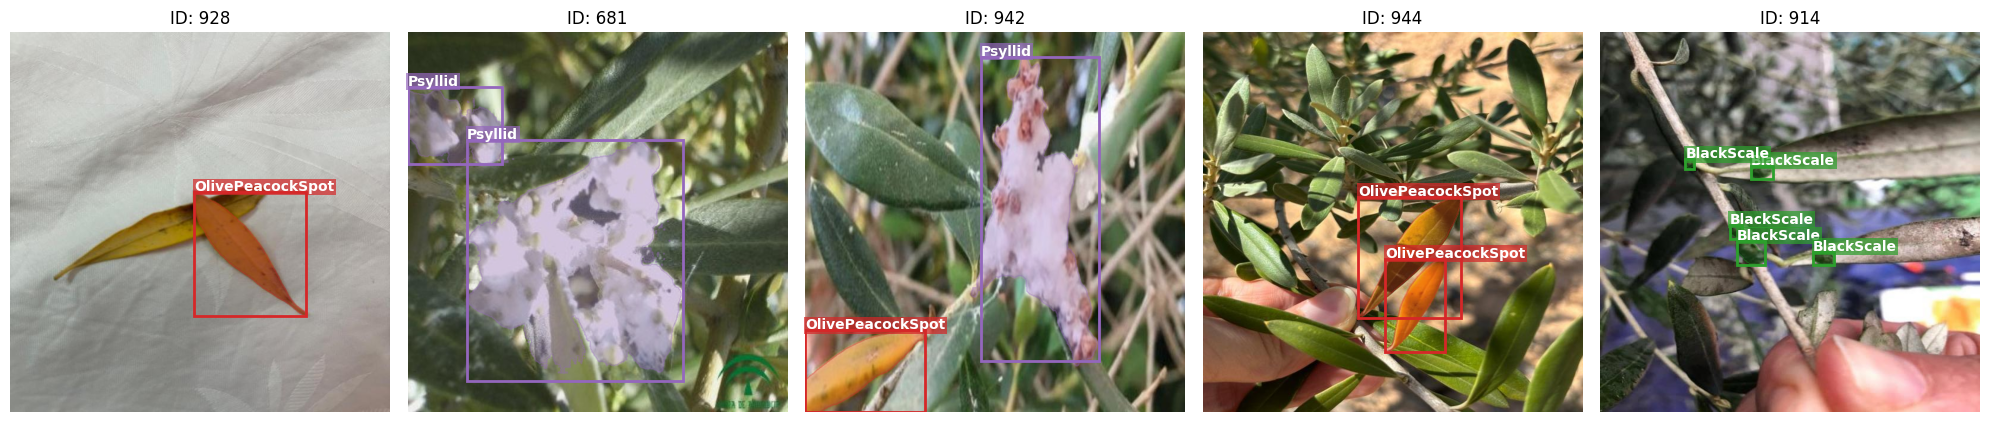

In [19]:
# Visualize random samples
if len(coco_data['images']) > 0:
    num_samples = 5
    sample_size = min(num_samples, len(coco_data['images']))
    random_imgs = random.sample(coco_data['images'], sample_size)
    
    # Create subplots
    fig, axes = plt.subplots(1, sample_size, figsize=(4 * sample_size, 5))
    if sample_size == 1:
        axes = [axes]
        
    for i, img in enumerate(random_imgs):
        print(f"Visualizing Image ID: {img['id']}, File: {img['file_name']}")
        show_image_with_anns(img['id'], ax=axes[i])
        axes[i].set_title(f"ID: {img['id']}")
    
    plt.tight_layout()
    plt.show()
else:
    print("No images found in dataset.")